## **SIFT + SVM MIN_KEY approach**
#### **Accuracy = 27.67% (approx)**
#### **Test run - 1**

#### **Aim: To find the accuracy of the SIFT plus SVM model .**

#### **For mounting drive**

In [1]:
#For mounting GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Required modules**

In [2]:
#Req. opencv 4.5+
!pip uninstall opencv-python
!pip install opencv-python

Found existing installation: opencv-python 4.5.5.64
Uninstalling opencv-python-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Gui-ba0a2070.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5XcbQpa-ca221f44.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/d

In [3]:
#Importing necessary libraries
from zipfile import ZipFile
from tensorflow.python.client import device_lib
import platform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, accuracy_score
import cv2
import os
import sys
import numpy as np
import random

#### **Functions definition**

In [4]:
def extract_zip(file_name = "drive/MyDrive/raw_vowels_3K_imag.zip"):
    with ZipFile(file_name, "r") as zip:
        zip.extractall()
        print("Dataset Extracted")

In [5]:
def python_ver():
    print("\nPython version:\n")
    print(sys.version)

def device_info():
    print("\nDevice Info:\n")
    print(device_lib.list_local_devices())

def platform_info():
    print("\nPlatform Info:\n")
    print(platform.platform())
    print(platform.processor())

In [6]:
def SIFT_test(dirs, labels, img_size):
    """Scale Invariant Feature Transform Test run for finding the minimum keypoints detected among all the images in the dataset"""
    
    min_key = np.inf
    
    for data_dir in dirs:
        for label in labels:
            path = os.path.join(data_dir, label)
            for img in os.listdir(path):
                #Reading the image in grayscale mode
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                   
                #Reshaping images to preferred size
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 

                #detecting keypoints
                sift = cv2.SIFT_create()
                keypoints = sift.detect(resized_arr, None)

                if (len(keypoints) < min_key):
                    min_key = len(keypoints)
                
    return min_key

In [7]:
def SIFT(image, min_key):
    """Scale Invariant Feature Transform for finding keypoints and computing descriptors"""
    
    sift = cv2.SIFT_create(min_key)
    keypoints, descriptors = sift.detectAndCompute(image, None)

    return np.array(descriptors, dtype="i")[:min_key]

In [8]:
def dataset_creation(data_dir, labels, img_size, min_key):
    """Loading data and shuffling"""
    data = [] 

    for class_num, label in enumerate(labels): 
        path = os.path.join(data_dir, label)
        for img in os.listdir(path):
            try:
                #Reading the image in grayscale mode
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
                #Reshaping images to preferred size
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 

                #SIFT function call
                SIFT_img_desc = SIFT(resized_arr, min_key)
                
                data.append([SIFT_img_desc, class_num])
            except Exception as err:
                print("Error:\n",err)
    
    random.shuffle(data)
    return np.array(data)

In [9]:
def dataset_creation_train_stat(labels, train):
    """Plot initial data graph"""
    list_graph = []
    for i in train:
        list_graph.append(labels[i[1]])
    
    sns.set_style('darkgrid')
    plt.figure(figsize=(25, 25))    
    sns.countplot(list_graph)
    plt.title("Train set")
    plt.show()


def dataset_creation_test_stat(labels, test):
    """Plot initial data graph"""
    list_graph = []
    for i in test:
        list_graph.append(labels[i[1]])
    
    sns.set_style('darkgrid')
    plt.figure(figsize=(25, 25))
    sns.countplot(list_graph)
    plt.title("Test set")
    plt.show()

In [10]:
def train_test_data_split(train, test):
    """train and test"""
    x_train = []
    y_train = []
    x_test = []
    y_test = []

    for feature, label in train:
        x_train.append(feature.flatten())
        y_train.append(label)

    for feature, label in test:
        x_test.append(feature.flatten())
        y_test.append(label)

    return (np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test))

In [11]:
def build_model_svm(x_train, y_train):
    """Builds SVM model"""
    model = SVC(kernel='rbf') 
    model.fit(x_train, y_train)
    
    return model

In [12]:
def acc_results(model, labels, x_test, y_test):
    """Prediction and test accuracy"""
    predictions = model.predict(x_test)
    print(classification_report(y_test, predictions, target_names = labels))
    accuracy = accuracy_score(y_test, predictions)*100 
    print("\nAccuracy = "+str(accuracy)+"%")

#### **Making Function calls and defining variables**

In [13]:
#Extracting Dataset
extract_zip("drive/MyDrive/raw_vowels_3K_imag.zip")

#Device and environment Info
python_ver()
device_info()
platform_info()

Dataset Extracted

Python version:

3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]

Device Info:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8024956171168748739
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11320098816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15662930146375202763
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]

Platform Info:

Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
x86_64


In [14]:
#Variables
dirs = ["raw_vowels_3K_imag/Train", "raw_vowels_3K_imag/Test"]
labels = ['A','Aa','E','Ee','I','O','Oo','U','Uu','Yae','Ye']
img_size = 180

In [15]:
#Min keypoints detection
min_key = SIFT_test(dirs, labels, img_size)

#Train and Test data loading
train = dataset_creation("raw_vowels_3K_imag/Train", labels, img_size, min_key)
test = dataset_creation("raw_vowels_3K_imag/Test", labels, img_size, min_key)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


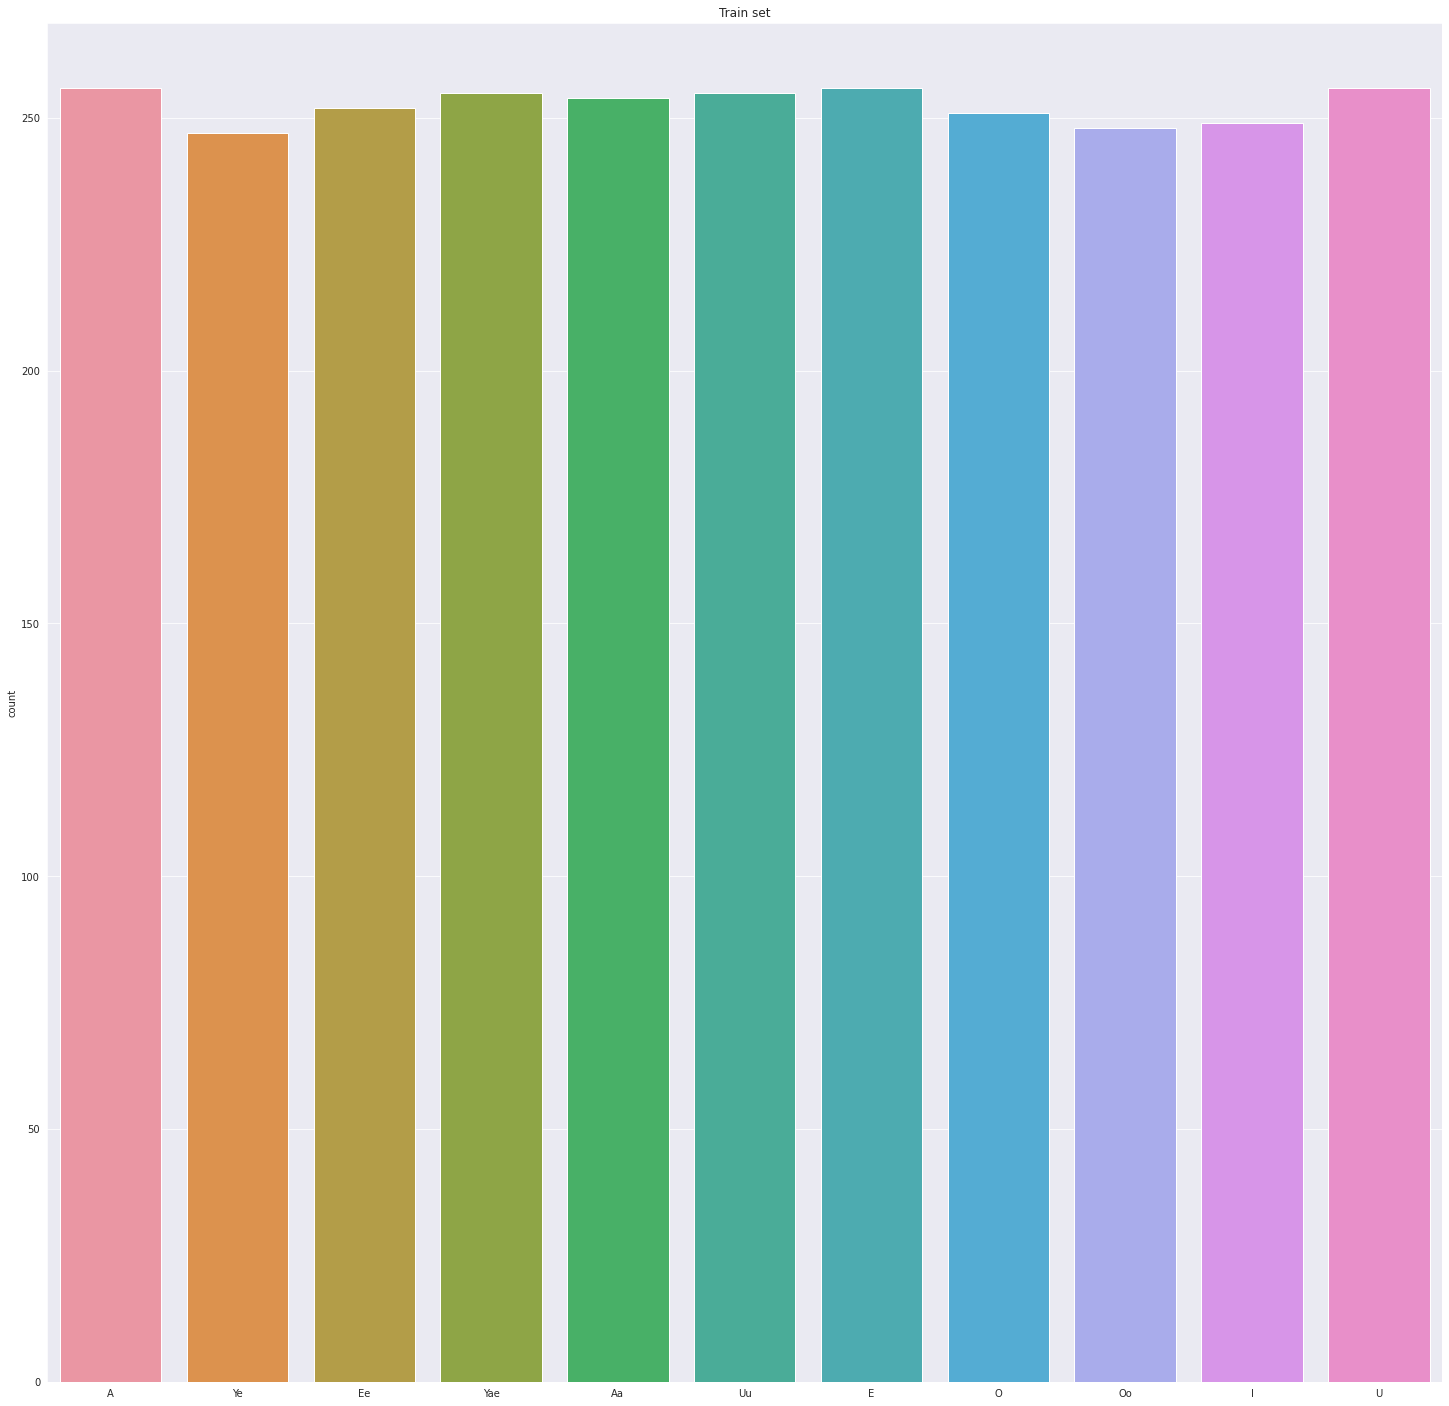

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


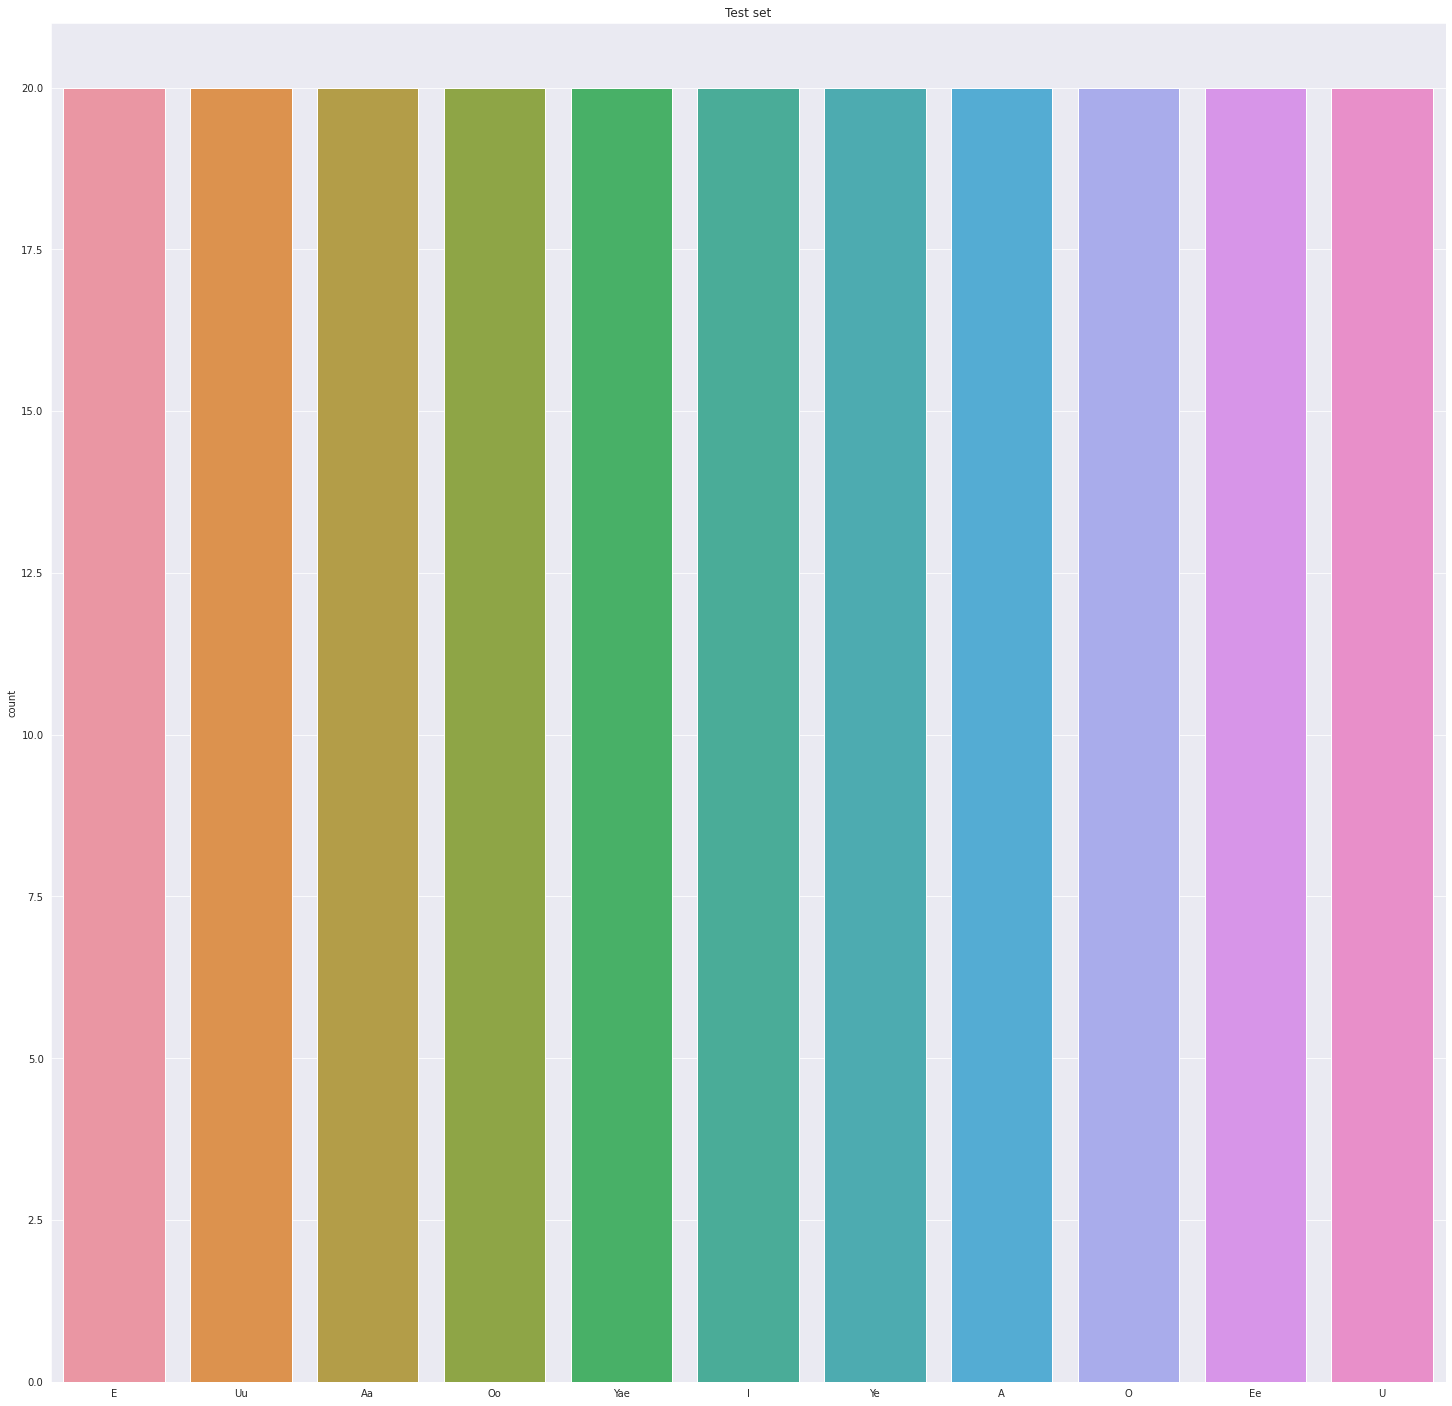

In [16]:
#Stats
dataset_creation_train_stat(labels, train)
dataset_creation_test_stat(labels, test)

In [17]:
#Training and testing data
x_train, y_train, x_test, y_test = train_test_data_split(train, test)

In [18]:
#Building SVM Model
model = build_model_svm(x_train, y_train)

In [19]:
#Results
acc_results(model, labels, x_test, y_test)

              precision    recall  f1-score   support

           A       0.13      0.10      0.11        20
          Aa       0.38      0.30      0.33        20
           E       0.27      0.55      0.36        20
          Ee       0.86      0.90      0.88        20
           I       0.36      0.45      0.40        20
           O       0.12      0.10      0.11        20
          Oo       0.28      0.25      0.26        20
           U       0.21      0.25      0.23        20
          Uu       0.50      0.50      0.50        20
         Yae       0.15      0.10      0.12        20
          Ye       0.00      0.00      0.00        20

    accuracy                           0.32       220
   macro avg       0.30      0.32      0.30       220
weighted avg       0.30      0.32      0.30       220


Accuracy = 31.818181818181817%


#### **Result: By considering SIFT plus SVM we obtained an accuracy of 27.67% (approx).**